# KNN 
Explain
KNN (K-Nearest Neighbors) is a supervised learning algorithm that can be used for
classification and regression tasks. It works by finding the K most similar instances in the training data to a
    given test instance, and predicting the majority or average class label of these K instances.

    # advantages of knn
    1. Simple to implement
    2. No need of training phase not much time
    3. versatile
1.  # cons:
2.  1. computational expensive
3.  2. sensitive to imbalanced data
4.  4. sensitive to irrerevant features  which has no links of tables
5.  
# KNN algorithm where to use
   1. Recommendation system  --- ads,next videos,finanial services,banking loan,health care
1.  banking mein - fraud detection

u can use for regresion - mean and median
in classification also but use mode (mode is repetive values)

# knn distance measure methods
# 1. Euclidean distance
# 2. Manhattan distance
# 3. Minkowski distance
# 4. Hamming distance

Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\Owner\AppData\Local\Temp\ipykernel_1872\240960850.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='black', cmap='coolwarm', marker='x', label='Test Data')


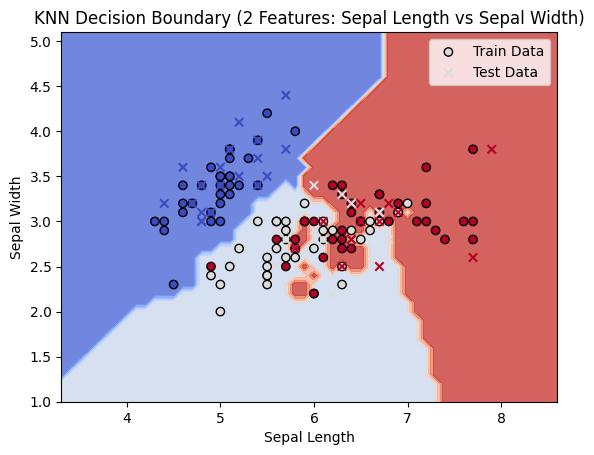

: 

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (species)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = knn.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visualize the results (for 2D data)
# We'll use just two features (sepal length and sepal width) for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the model again using just two features
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train)

# Create a meshgrid for plotting the decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict for each point in the meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='black', cmap='coolwarm', marker='o', label='Train Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='black', cmap='coolwarm', marker='x', label='Test Data')

plt.title('KNN Decision Boundary (2 Features: Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
